<img src="images/kiksmeisedwengougent.png" alt="Banner" width="1100"/>

<div>
    <font color=#690027 markdown="1">   
        <h1>CLASSIFICATIE VAN DE MNIST DATASET MET EEN NEURAAL NETWERK</h1>
    </font>
</div>

<div class="alert alert-box alert-success">
Deze notebook bevat een <em>concreet voorbeeld van een neuraal netwerk</em> dat wordt opgebouwd met de functionaliteiten van de Python-module <em>Keras</em>. <br>
Het voorbeeld betreft een <em>classificatieprobleem</em>, nl. het classificeren van grijswaardenafbeeldingen van handgeschreven cijfers. 
</div>

De afbeeldingen moeten aan het AI-systeem worden aangeboden in een formaat van 28x28 pixels; er zijn 10 klassen met labels 0 t.e.m. 9. 

Om het netwerk te trainen wordt gebruikgemaakt van de MNIST-dataset. Deze dataset bestaat uit 60 000 afbeeldingen om het netwerk te trainen en  10 000 afbeeldingen om het netwerk te testen. <br>
Deze afbeeldingen werden verzameld door het National Institute of Standards and Technology (de NIST in het letterwoord MNIST) in de jaren 80. 

### Nodige modules importeren

In deze notebook bouw je een *sequential model* op met Keras.<br>Dat is een model dat bestaat uit *aaneengeschakelde lagen*. 
Je zal werken met een input layer, een output layer en ertussen één hidden layer.<br>
Je zal dus dat model en de lagen moeten kunnen aanmaken.

Je importeert de module 'NumPy' om te rekenen, via de module 'Matplotlib' zal je grafieken kunnen maken; de module 'Keras' zal je voorzien van de nodige bouwblokken om je neuraal netwerk te realiseren.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras.utils import to_categorical         # om klassen op andere manier te kunnen weergeven
from keras.datasets import mnist

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

<div style='color: #690027;' markdown="1">
    <h2>1. Inlezen van de data</h2> 
</div>

De MNIST data bestaan uit een koppel. Bovendien is elk van beide elementen van het koppel is zelf een koppel.  

De data zijn als volgt opgebouwd:
-  (trainingdata, overeenkomstige categorieën) in het eerste element;
-  (testdata, overeenkomstige categorieën) in het tweede element.

Je laadt de dataset in met de instructie `mnist.load_data()`. <br>`load_data()` is een functie van `mnist`. <br>Ondertussen benoem je vier variabelen die elk verwijzen naar een bepaalde soort data in de dataset.  

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()      # elementen van tuples krijgen juiste naam

### Opdracht 1.1
-  Hoeveel elementen bevat het object waarnaar `train_images` verwijst?
-  Hoeveel elementen bevat het object waarnaar `test_labels` verwijst?

Controleer je antwoord m.b.v. de volgende code-cel.

In [3]:
print(len(train_images))         # aantal punten in trainingset
print(len(train_labels))         # aantal labels in trainingset
print(len(test_images))          # aantal punten in testset
print(len(test_labels))          # aantal labels in testset

60000
60000
10000
10000


### Opdracht 1.2
Wat betekent de uitvoer van de volgende code-cellen?

In [4]:
train_images.shape                   

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

Antwoord:

<div style='color: #690027;' markdown="1">
    <h2>2. Bekijken van de data</h2> 
</div>

In [6]:
beeld1 = train_images[4]
beeld2 = train_images[100]
label1 = train_labels[4]
label2 = train_labels[100]

9 5


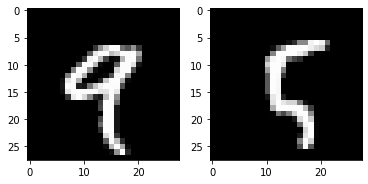

In [7]:
# labels
print(label1, label2)

# beelden
plt.figure()

plt.subplot(1,2,1)
plt.imshow(beeld1, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(beeld2, cmap="gray")

plt.show()

In [8]:
print(beeld1.shape)
print(beeld1)

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 2

### Opdracht 2.1
Vraag het grootste en kleinste getal in deze matrix op en het type van de getallen.

In [9]:
beeld1.dtype

dtype('uint8')

In [10]:
print(np.min(beeld1), np.max(beeld1))

0 255


Antwoord:

<div style='color: #690027;' markdown="1">
    <h2>3. Opbouwen van het neuraal netwerk</h2> 
</div>

<div style='color: #690027;' markdown="1">
    <h3>3.1 Architectuur van het neuraal netwerk</h3> 
</div>

Je model voor het netwerk is een *Sequential model* dat bestaat uit aaneengeschakelde lagen: een *input layer*, een *output layer* en ertussen één *hidden layer*. <br>
Je gebruikt *dense layers*. Dat betekent dat het *fully connected* layers zijn: de neuronen in een bepaalde laag zijn verbonden met alle neuronen in de vorige laag.<br>
In elke laag moet je een keuze maken voor het aantal outputneuronen van die laag. <br>
Voor de uitvoerlaag ligt dat vast: aangezien er tien klassen zijn, moet het model voor elke klasse weergeven hoe zeker het is van die bepaalde klasse. Je hebt daar dus 10 neuronen. <br> Voor de verborgen laag kan je wat experimenteren met het aantal neuronen en de performanties van het netwerk vergelijken. <br>

Het model moet de *input* krijgen in de vorm van een tensor die bestaat uit *vectoren*. Bovendien moet het model weten hoeveel elementen elk datapunt, dus elke vector, in die tensor bevat. Dat wordt met de eerste laag meegegeven met de parameter `input_dim`.<br>
Met de volgende lagen moet dat niet meegegeven worden, aangezien het aantal elementen dan automatisch vastligt door de wiskundige bewerkingen die zullen gebeuren.

In de hidden layer en in de output layer wordt er na de lineaire transformaties, bepaald door de *weights* gekozen door het netwerk, ook nog een activatiefunctie toegepast. Welke *activatiefunctie* dat is, moet jij vastleggen. In de meeste moderne netwerken wordt er gekozen voor 'ReLU'. De activatiefunctie in de output layer wordt eigenlijk bepaald door het soort probleem. Aangezien je hier een classificatieprobleem hebt met meer dan twee klassen, is de activatiefunctie de 'Softmax activatiefunctie'.

Om de architectuur te voltooien moet je nog een *loss*-functie en een *optimizer* kiezen. Met de loss-functie wordt bekeken hoeveel het model afwijkt van de labels. De totale fout hierop zal geminimaliseerd worden m.b.v. de optimizer. Tot slot kies je nog een *metrics* waarmee je de *performantie* van het model kunt nagaan. Hier kies je voor 'accuracy', het percentage datapunten dat aan de juiste categorie wordt toegekend. 

In [11]:
# architectuur netwerk    
network = models.Sequential()                                          #'Sequential model' bestaat uit aaneengeschakelde lagen
network.add(layers.Dense(15, activation='relu', input_dim= 28 * 28))   # hidden layer: 15 neuronen, activatiefunctie
network.add(layers.Dense(10, activation='softmax'))                    # output layer: 10 outputneuronen, activatiefunctie
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])                                  # optimizer, loss en metrics kiezen

Instructions for updating:
Colocations handled automatically by placer.


<div style='color: #690027;' markdown="1">
    <h3>3.2 Trainen van het neuraal netwerk</h3> 
</div>

Hiervoor vroeg je via `train_images.shape` dhet formaat van de trainingsafbeeldingen op. Deze datapunten zijn matrices. Deze datapunten moeten echter aangeboden worden als vectoren. 

De dimensie van elke vector ligt vast in de architectuur van het netwerk. Elk datapunt moet dus omgevormd worden naar een vector met dimensie 784. 

De 60 000 28x28-matrices moeten dus omgevormd worden tot vectoren, of m.a.w. je moet de trainingset omvormen van een stapel van 60 000 28x28-matrices naar een stapel van 60 000 vectoren.

Bovendien is het beter de waarden van de afbeeldingen te *normaliseren*. 

<div class="alert alert-block alert-warning"> 
Meer uitleg over normaliseren vind je in dit leerpad bij 'Standaardiseren'.
</div>

In [12]:
# voorbereiden van dataset

# trainingset van stapel van 60 000 28x28-matrices naar stapel van 60 000 vectoren
train_images = train_images.reshape((60000, 28 * 28))      
train_images = train_images.astype("float32") / 255            # elementen herschalen naar interval [0,1] ipv [0,255]

# testset van stapel van 10 000 28x28-matrices naar stapel van 10 000 vectoren
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# labels opslaan in andere gedaante bv. 0 wordt 1000000000, 1 wordt 0100000000, ...
# 7 wordt 00000001000 ... dus een 1 op plaats met index 7 (je begint te tellen vanaf index 0) 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
# trainen met methode `fit` van network, m.a.w. beelden en  labels op elkaar afstemmen
# 5 epochs, dus 5 keer trainingset doorlopen
# steeds 128 prenten per keer gebruiken om de optimizer op toe te passen, bv. gemiddelde afgeleide over 128 datapunten
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

loss = history.history["loss"]      # gedurende training telkens na elke epoch waarde loss-functie opslaan in lijst
acc = history.history["accuracy"]   # gedurende training telkens na elke epoch waarde loss-functie opslaan in lijst
epochs = range (1 , len(loss)+1)    # epochs nummeren van 1 tot aantal epochs 

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 2s 29us/step - loss: 1.4113 - accuracy: 0.6136
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.6905 - accuracy: 0.8318
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.5233 - accuracy: 0.8625
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.4543 - accuracy: 0.8766
Epoch 5/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.4160 - accuracy: 0.8851


In [14]:
print("loss =", loss)
print("acc =", acc)
print("epochs =", epochs)

loss = [1.411325148010254, 0.6905167783260345, 0.5232538019975026, 0.4543155096530914, 0.41603480197588605]
acc = [0.61363333, 0.8318167, 0.86251664, 0.87655, 0.8850833]
epochs = range(1, 6)


Zie je dat de loss daalt en de accuracy stijgt?

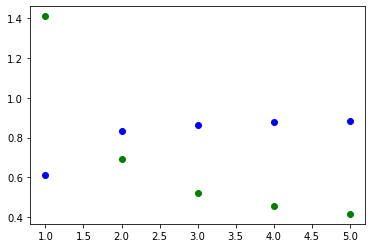

In [15]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
plt.figure()

plt.plot(epochs, acc, "o", color="blue", label="accuracy")
plt.plot(epochs, loss, "o", color="green", label="loss")
plt.legend(loc="lower left")

plt.show()

Beoordeel de nauwkeurigheid van het netwerk na de training. Is die behoorlijk op de trainingset? Vind je de fout groot of niet?

<div style='color: #690027;' markdown="1">
    <h3>3.3 Prestatie van het model</h3> 
</div>

Om te weten hoe goed het model is, moet je weten hoe goed het presteert op de testdata.<br> Het is niet omdat het model goed presteert op de trainingdata dat het ook goed presteert op ongeziene data. Je gaat dus na hoe de loss en accuracy is op de testdata. 

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 29us/step


In [17]:
print('test_acc:', test_acc)

test_acc: 0.8925999999046326


De nauwkeurigheid op de testset is zelfs nog beter dan op de trainingset. Dat betekent dat het model goed generaliseert. 

Door de volgende code-cel uit te voeren, test je het model op een datapunt uit de trainingdata (herneem `beeld1` van in het begin van de notebook). Eerst wordt ervoor gezorgd dat je werkt met het juiste formaat.

In [18]:
# datapunt voorbereiden
voorbeeld = train_images[4].reshape((1, 28 * 28))
# testen
network.predict(voorbeeld)

array([[3.0872525e-05, 6.8914465e-04, 9.7753567e-05, 2.6518354e-04,
        9.2170492e-02, 3.9314877e-04, 7.4661832e-05, 3.2534067e-02,
        3.4095913e-03, 8.7033510e-01]], dtype=float32)

Wat je hier krijgt is een array waarin staat hoe zeker het model is dat het aangeboden datapunt een 0, een 1, een 2, enz. is, in die volgorde. Die zekerheden worden uitgedrukt in procent.

Vul in en verwijder wat niet past:

Het model is het meest zeker dat het een .... is. <br>
Die zekerheid is .... <br>
Correct/Foutief geclassificeerd!

<div class="alert alert-box alert-info">
Het verschil tussen de <em>training accuracy</em> en de <em>test accuracy</em> is belangrijk. Als de training accuracy groter is dan de test accuracy, dan spreekt men van <em>overfitting</em>: het feit dat het model slechter gaat presteren op nieuwe data dan op de trainingdata.
</div>

<div style='color: #690027;' markdown="1">
    <h3>3.4 Model testen op ongeziene data</h3> 
</div>

Kan het model ook cijfers herkennen die we zelf schreven? Probeer het uit.

In [19]:
zeven = np.loadtxt("../.data/IntroductieDeepLearning/zeven.dat")
vier = np.loadtxt("../.data/IntroductieDeepLearning/vier.dat")
twee = np.loadtxt("../.data/IntroductieDeepLearning/twee.dat")

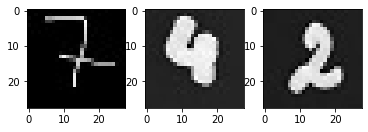

In [20]:
plt.figure()

plt.subplot(1,3,1)
plt.imshow(zeven, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(vier, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(twee, cmap="gray")

plt.show()

Gelijken deze cijfers voldoende op die van de dataset?
Waarom is dat van belang?

Antwoord:

In [21]:
print(zeven.shape, twee.shape, vier.shape)

(28, 28) (28, 28) (28, 28)


In [22]:
print(zeven)
print(zeven.dtype)

[[0.         0.00392157 0.         0.00392157 0.00392157 0.00392157
  0.         0.00392157 0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.00392157
  0.01176471 0.         0.         0.         0.01568627 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.01960784 0.         0.         0.
  0.01568627 0.         0.00392157 0.00392157 0.00392157 0.
  0.         0.         0.         0.00784314 0.         0.
  0.         0.         0.01568627 0.00392157 0.         0.00392157
  0.         0.         0.         0.        ]
 [0.02352941 0.         0.         0.         0.         0.4627451
  0.42745098 0.47843137 0.52156863 0.5254902  0.53333333 0.5372549
  0.5372549  0.54509804 0.56470588 0.58431373 0.11764706 0.01568627
  0.00392157 0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.01960784 0.15686275
  0.17254902 0.08

De datapunten hebben de vorm van matrices.

Bekijk hoe het model presteert op deze cijfers.

In [23]:
# data voorbereiden
zeven = zeven.reshape((1, 28 * 28))              # omvormen naar tensor die 1 vector bevat
vier = vier.reshape((1, 28 * 28))
twee = twee.reshape((1, 28 * 28))
# print(nieuw formaat)
print(zeven.shape, twee.shape, vier.shape)

(1, 784) (1, 784) (1, 784)


In [24]:
network.predict(zeven)

array([[0.01145619, 0.30475664, 0.0576021 , 0.07958981, 0.1300213 ,
        0.0990309 , 0.14515299, 0.02807657, 0.0782293 , 0.06608422]],
      dtype=float32)

In [25]:
network.predict(vier)

array([[1.7666358e-04, 3.7161188e-04, 2.0414732e-02, 2.4262166e-01,
        1.1666923e-01, 1.6898720e-02, 9.6693164e-04, 5.2127916e-02,
        5.9311587e-02, 4.9044096e-01]], dtype=float32)

In [26]:
network.predict(twee)

array([[4.9433304e-05, 2.8691734e-03, 9.2595756e-01, 4.0767122e-02,
        1.0397677e-05, 2.9245130e-04, 4.4080419e-03, 6.8588422e-05,
        2.4883110e-02, 6.9407979e-04]], dtype=float32)

Hoe presteert het model op deze zelfgeschreven cijfers?

Antwoord:

### Opdracht 3.1
Schrijf zelf enkele cijfers en test uit of het model jouw handschrift leest!<br>

<div class="alert alert-block alert-warning">
In het onderdeel 'Van jpg naar npy' in het leerpad 'Digitale beelden' lees je meer over hoe je je afbeeldingen naar het gewenste formaat omvormt.
</div>

Besluit:

<div style='color: #690027;' markdown="1">
    <h2>4. Op zoek naar een beter model</h2> 
</div>

### Opdracht 4.1
Pas het aantal neuronen en het aantal epochs in de netwerk-architectuur aan om de prestaties van het netwerk te verbeteren. 

Wie haalt de beste nauwkeurigheid?

De beste nauwkeurigheid die je model haalt is ........ voor de trainingset en .... voor de testset.

### Opdracht 4.2
Test je model uit op je eigen cijfers.<br>

Tip: vermijd *overfitting*.

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Chollet, F. (2018). *Deep learning with Python*. Manning publications.<br>
[2] Getting started with the Keras Sequential model. Geraadpleegd op 25 september 2019 via https://keras.io/getting-started/sequential-model-guide/.

<div>
    <h2>Met steun van</h2>
</div>

<img src="images/kikssteun2.png" alt="Banner" width="1100"/>

<img src="images/cclic.png" alt="Banner" align="left" width:="100"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 